Number of images to be processed: 25


<IPython.core.display.Javascript object>


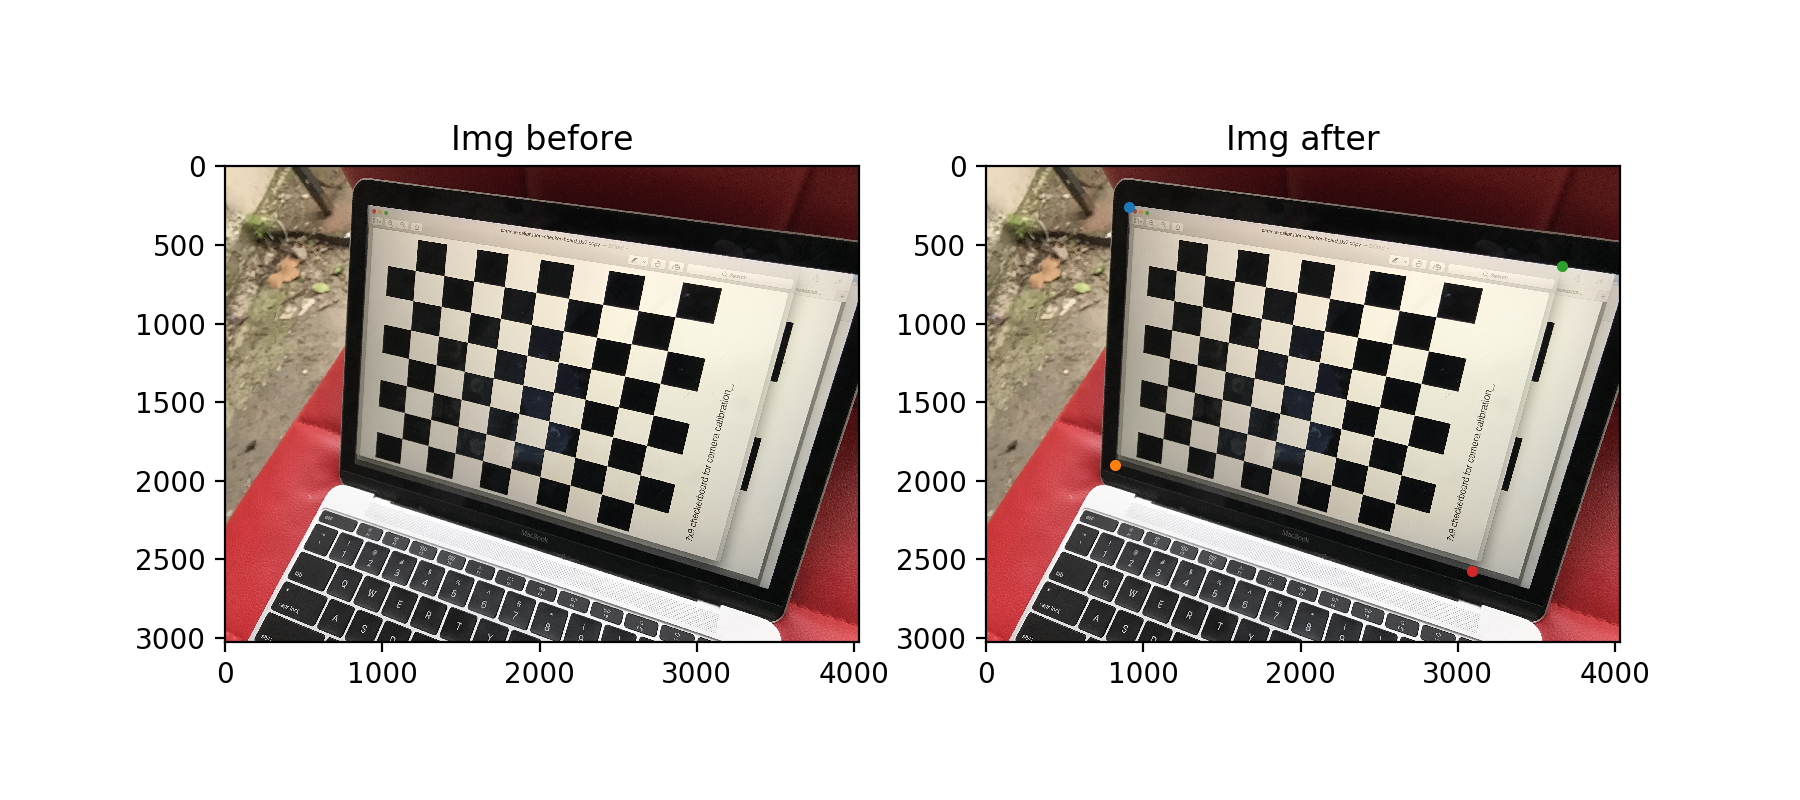

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from os import listdir
from os.path import isfile, join
%matplotlib notebook

# set assumption
src = np.float32([[910, 256],[820, 1901],[3661, 634],[3091, 2576]])
dst = np.float32([[820, 456],[820, 2101],[3091, 456],[3091, 2101]])

# Generate all image paths
path_to_data = 'imgs/'
img_paths = [join(path_to_data,f) for f in listdir(path_to_data) if isfile(join(path_to_data,f)) and not f.startswith('.')]
print("Number of images to be processed: {}".format(len(img_paths)))
img = plt.imread(img_paths[2])

f, (p1, p2) = plt.subplots(1,2, figsize=(9,4))
p1.imshow(img)
p1.set_title("Img before")
p2.imshow(img)
p2.set_title("Img after")
p2.plot(910, 256, '.')
p2.plot(820, 1901, '.')
p2.plot(3661, 634, '.')
p2.plot(3091, 2576, '.')

In [9]:
# define perspective transformation function
def warp(img, src, dst):
    img_sz = (img.shape[1], img.shape[0])
    M = cv2.getPerspectiveTransform(src, dst)
    warped_img = cv2.warpPerspective(img, M, img_sz, flags=cv2.INTER_LINEAR)
    return warped_img

<IPython.core.display.Javascript object>


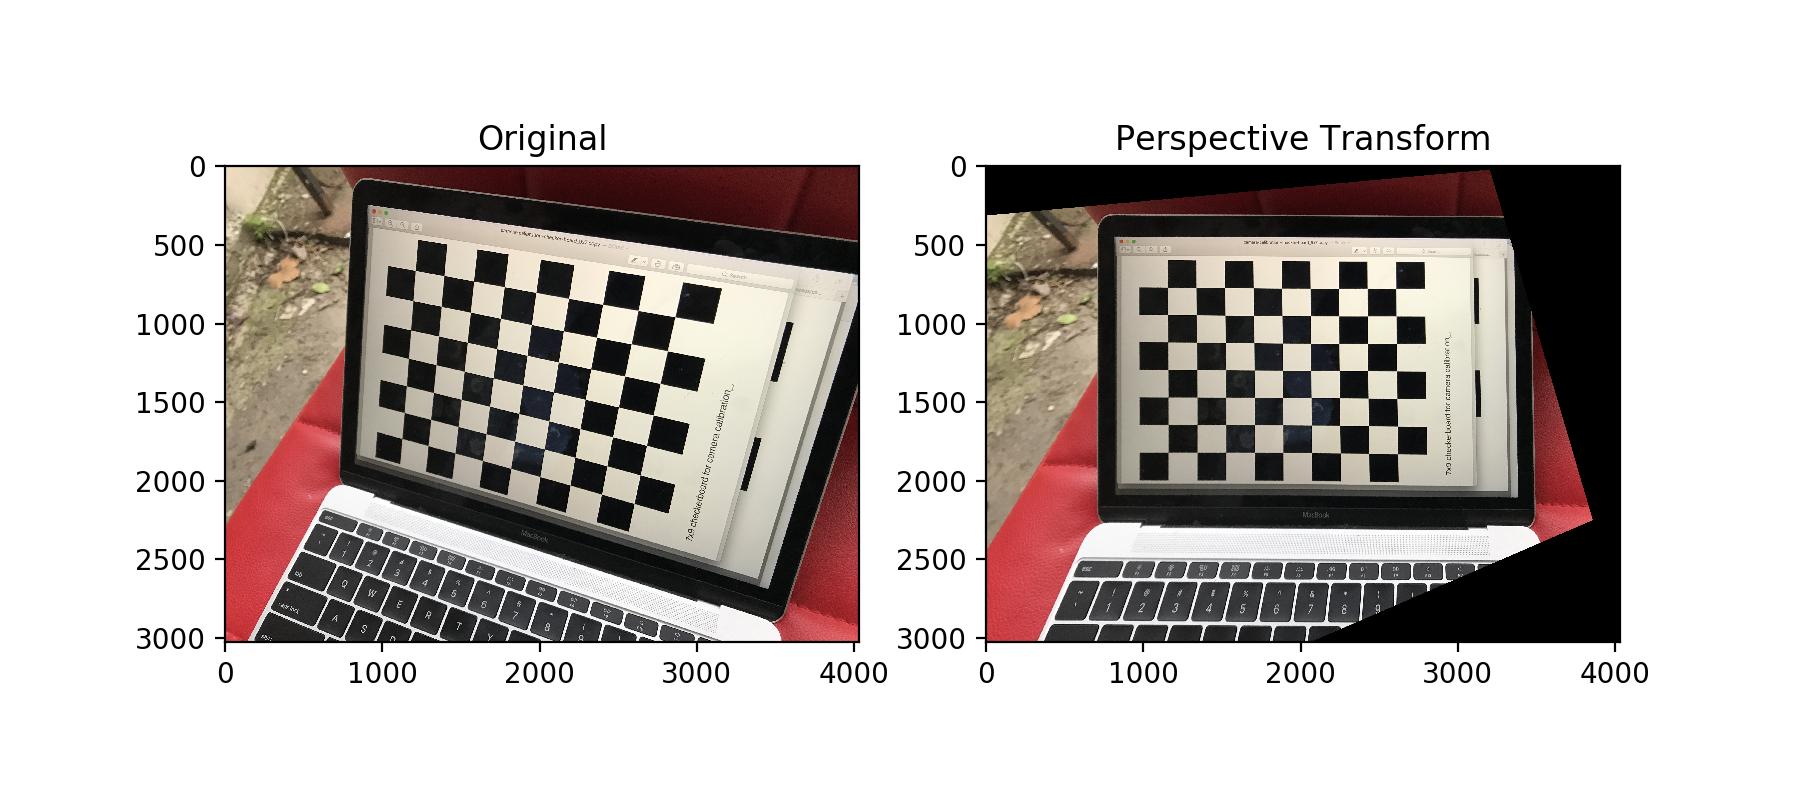

In [10]:
# run and plot result of perspective transformation
f, (p1, p2) = plt.subplots(1,2, figsize=(9,4))
p1.imshow(img)
p1.set_title("Original")
warped_img = warp(img, src, dst)
p2.imshow(warped_img)
p2.set_title("Perspective Transform")